In [1]:
include("./trajopt/utils.jl")
include("./trajopt/dynamics.jl")
include("./trajopt/constraint.jl")
include("./trajopt/costfunction.jl")
include("./trajopt/scaling.jl")
include("./trajopt/scp.jl")
include("./trajopt/discretize.jl")
using Plots

In [2]:
ix = 6
iu = 3
N = 10
g = 9.81
dynamics = ThreeDOFManipulatorDynamics(g)
m1 = dynamics.m1
m2 = dynamics.m2
m3 = dynamics.m3
I1 = dynamics.I1
I2 = dynamics.I2
I3 = dynamics.I3
l1 = dynamics.l1
l2 = dynamics.l2
l3 = dynamics.l3
l_g1 = dynamics.lg1
l_g2 = dynamics.lg2
l_g3 = dynamics.lg3

0.5

In [3]:
tau_max = 20.0
dq_max = 5.0
mani_const = ThreeDOFManipulatorConstraint(tau_max,dq_max)
list_const = [mani_const];

In [4]:
xi = [-pi/2,0,0,0,0,0]
xf = zeros(ix)
@assert length(xi) == ix
@assert length(xf) == ix

In [5]:
# initial guess
q1 = xf[1]
q2 = xf[2]
q3 = xf[3]
u0_1 = g*(l_g1*m1*cos(q1) + m2*(l1*cos(q1) + l_g2*cos(q1 + q2)) + m3*(l1*cos(q1) + l2*cos(q1 + q2) + l_g3*cos(q1 + q2 + q3)))
u0_2 = g*(l_g2*m2*cos(q1 + q2) + m3*(l2*cos(q1 + q2) + l_g3*cos(q1 + q2 + q3)))
u0_3 = g*l_g3*m3*cos(q1 + q2 + q3)

4.905

In [6]:
x0 = zeros(ix,N+1);
u0 = ones(iu,N+1);
u0[1,:] .= u0_1
u0[2,:] .= u0_2
u0[3,:] .= u0_3

tf0 = 5.0;
dt0 = tf0/N*ones(N);

for i = 1:N+1
    x0[:,i] = (N-i+1)/N*xi+(i-1)/N*xf;
end

In [7]:
xmin = zeros(ix)
xmax = pi*ones(ix)
umin = zeros(iu)
umax = [tau_max,tau_max,tau_max]
min_dt = 0.1 / N;
max_dt = 20 / N;
scaler = Scaling(xmin, xmax, umin, umax, tf0, min_dt,max_dt)
@assert max_dt * N >= tf0 

In [8]:
max_iter = 80;
w_tf = 2*1e0;
w_c = 0.0;
w_rate = 1e-2;
w_param = 0.0;
w_vc = 1e2;
w_tr::Float64 = 1e-2;
tol_vc = 1e-6;
tol_tr = 1e-3;
tol_dyn = 1e-1;
tr_norm = "quad";
verbosity = true;
flag_tf_free = true;

In [9]:
ptr = PTR(N,tf0,max_iter,dynamics,list_const,scaler,
    w_tf,w_c,w_rate,w_param,w_vc,w_tr,
    tol_vc,tol_tr,tol_dyn,
    tr_norm,verbosity,flag_tf_free=flag_tf_free)

PTR(ThreeDOFManipulatorDynamics(6, 3, 3, 3, 3, 3, [1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … 1.0 0.0; 0.0 0.0 … 0.0 1.0], [0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0], [0 0 0; 0 0 0; … ; 0 1 0; 0 0 1], [1.0 0.0 … 0.0 0.0; 0.0 1.0 … 0.0 0.0; … ; 0.0 0.0 … 1.0 0.0; 0.0 0.0 … 0.0 1.0], [0.0 0.0 0.0; 0.0 0.0 0.0; 0.0 0.0 0.0], [0.0, 0.0, 0.0], 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.5, 0.5, 0.5, 0.08333333333333333, 0.08333333333333333, 0.08333333333333333, 9.81), Constraint[ThreeDOFManipulatorConstraint(20.0, 5.0)], Scaling([3.141592653589793 0.0 … 0.0 0.0; 0.0 3.141592653589793 … 0.0 0.0; … ; 0.0 0.0 … 3.141592653589793 0.0; 0.0 0.0 … 0.0 3.141592653589793], [0.3183098861837907 0.0 … 0.0 0.0; 0.0 0.3183098861837907 … 0.0 0.0; … ; 0.0 0.0 … 0.3183098861837907 0.0; 0.0 0.0 … 0.0 0.3183098861837907], [0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [20.0 0.0 0.0; 0.0 20.0 0.0; 0.0 0.0 20.0], [0.05 0.0 0.0; 0.0 0.05 0.0; 0.0 0.0 0.05], [0.0, 0.0, 0.0], 5.0, 0.01, 2.0, 2.127977831e-314), Solution([0.0 0.0 … 0.0 

In [10]:
import Gurobi
run(ptr,x0,u0,dt0,xi,xf,Gurobi)

Set parameter Username
Academic license - for non-commercial use only - expires 2024-11-27
+--------------------------------------------------------------------------------------------------+
|                                   ..:: Penalized Trust Region ::..                               |
+-------+------------+-----------+-----------+-----------+---------+---------+----------+----------+
| iter. |    cost    |    tof    |   main    |   rate    |  param  | log(vc) | log(tr)  | log(dyn) |
+-------+------------+-----------+-----------+-----------+---------+---------+----------+----------+
|1      |0.96        |0.100     |5483.822    |10.031     |-1.000    |-8.9     | 1.8      |8.8e-01   |
|2      |42.80       |0.440     |10871.334    |17.924     |-1.000    |-0.4     | 1.9      |1.3e+00   |
|3      |46.03       |0.222     |10562.662    |9.746      |-1.000    |-0.3     | 1.7      |7.7e-01   |
|4      |49.42       |0.271     |7828.020    |5.418      |-1.000    |-0.3     | 1.8      |9.0e-0

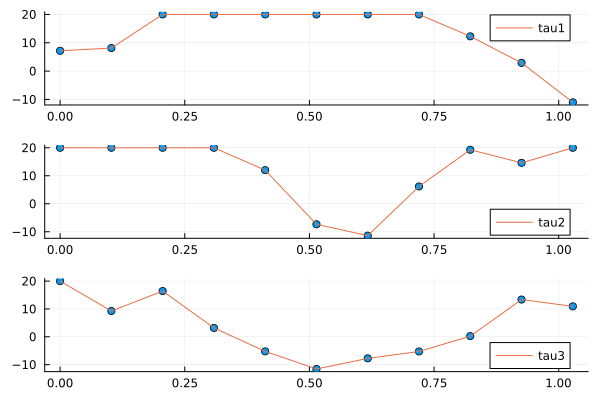

In [11]:
p1 = plot(ptr.solution.t,ptr.solution.u[1,:],seriestype = :scatter,label="")
plot!(ptr.solution.t,ptr.solution.u[1,:],label="tau1")
p2 = plot(ptr.solution.t,ptr.solution.u[2,:],seriestype = :scatter,label="")
plot!(ptr.solution.t,ptr.solution.u[2,:],label="tau2")
p3 = plot(ptr.solution.t,ptr.solution.u[3,:],seriestype = :scatter,label="")
plot!(ptr.solution.t,ptr.solution.u[3,:],label="tau3")

plot(p1,p2,p3,layout=(3,1))

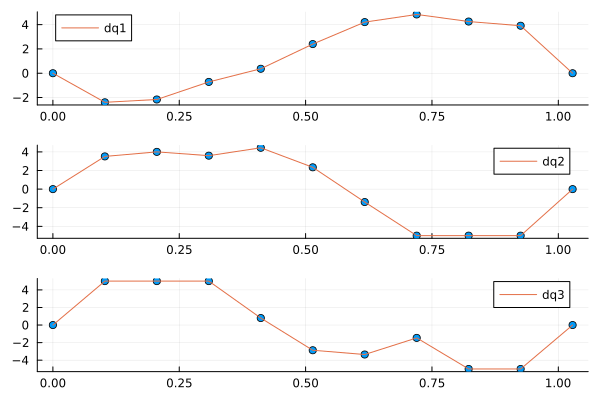

In [12]:
p1 = plot(ptr.solution.t,ptr.solution.x[4,:],seriestype = :scatter,label="")
plot!(ptr.solution.t,ptr.solution.x[4,:],label="dq1")
p2 = plot(ptr.solution.t,ptr.solution.x[5,:],seriestype = :scatter,label="")
plot!(ptr.solution.t,ptr.solution.x[5,:],label="dq2")
p3 = plot(ptr.solution.t,ptr.solution.x[6,:],seriestype = :scatter,label="")
plot!(ptr.solution.t,ptr.solution.x[6,:],label="dq3")

plot(p1,p2,p3,layout=(3,1))

In [13]:
using Interpolations
fps = 30
dtplot = 0.01
n = ceil(Int, (ptr.solution.tprop[end] - ptr.solution.tprop[1]) / dtplot) + 1
tplot = collect(range(ptr.solution.tprop[1], step=dtplot, length=n))
q1_fit = LinearInterpolation(ptr.solution.tprop, ptr.solution.xprop[1,:],extrapolation_bc=Flat());
q2_fit = LinearInterpolation(ptr.solution.tprop, ptr.solution.xprop[2,:],extrapolation_bc=Flat());
q3_fit = LinearInterpolation(ptr.solution.tprop, ptr.solution.xprop[3,:],extrapolation_bc=Flat());
q1 = q1_fit(tplot)
q2 = q2_fit(tplot)
q3 = q3_fit(tplot)
println(tplot)

# plot(ptr.solution.t,ptr.solution.x[1,:],seriestype = :scatter)
# plot!(ptr.solution.tprop,ptr.solution.xprop[1,:])
# plot!(tplot,q1)

┌ Warning: Duplicated knots were deduplicated. Use Interpolations.deduplicate_knots!(knots) explicitly to avoid this warning.
│   k1 = [0.0, 0.0004132878494611615, 0.0011969718842526414, 0.0021761761150056, 0.0034155790919649176, 0.004919838209095745, 0.006777386770364028, 0.009357139723959313, 0.011529443034286135, 0.013985337741889219, 0.016365304155576625, 0.018832544081237412, 0.021284318217380787, 0.023757080486846, 0.02622225505409533, 0.028687905034173844, 0.031147443491795386, 0.033604892787171534, 0.03606257783289308, 0.038525146822011816, 0.0409983365347376, 0.04348973492051805, 0.04600884028910518, 0.04856792281418345, 0.051183299553909205, 0.053878053628731465, 0.05668779266195598, 0.05967373517574845, 0.0629421295365985, 0.06617247099790342, 0.06942935836046397, 0.07271500268858494, 0.07606930463469837, 0.07950854135269497, 0.0830416162663382, 0.0866300481360157, 0.09021893288582424, 0.09378166381391066, 0.09731069334470789, 0.1008057044920603, 0.10282528167079236, 0.10282

[0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3, 0.31, 0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4, 0.41, 0.42, 0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5, 0.51, 0.52, 0.53, 0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6, 0.61, 0.62, 0.63, 0.64, 0.65, 0.66, 0.67, 0.68, 0.69, 0.7, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88, 0.89, 0.9, 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99, 1.0, 1.01, 1.02, 1.03]


In [14]:
x1 = dynamics.l1 .* cos.(q1)
y1 = dynamics.l1 .* sin.(q1)
x2 = dynamics.l1 .* cos.(q1) + dynamics.l2 .* cos.(q1+q2)
y2 = dynamics.l1 .* sin.(q1) + dynamics.l2 .* sin.(q1+q2)
x3 = dynamics.l1 .* cos.(q1) + dynamics.l2 .* cos.(q1+q2) + dynamics.l3 .* cos.(q1+q2+q3)
y3 = dynamics.l1 .* sin.(q1) + dynamics.l2 .* sin.(q1+q2) + dynamics.l3 .* sin.(q1+q2+q3)
;

In [15]:
lW = 3
idx = 2
anim = Animation()
for idx in 1:length(tplot)
    plot([0,x1[idx]], [0,y1[idx]],lw=lW,lc=:blue,label=false)
    plot!([x1[idx],x2[idx]], [y1[idx],y2[idx]],lw=lW,lc=:orange,label=false)
    plot!([x2[idx],x3[idx]], [y2[idx],y3[idx]],lw=lW,lc=:green,label=false)
    scatter!([3], [0], marker = (:star5, 10), label="", color=:red)
    xlims!(-3.2, 3.2)
    ylims!(-3.2, 0.25)
    my_text = @sprintf("time: %.3f", tplot[idx])
    annotate!(-2, -1, text(my_text, :black, :bold, 10))
    frame(anim)
end

GKS: could not find font bold.ttf


┌ Info: Saved animation to /Users/taewankim/Documents/Code/Personal/Funnel_CTCS/data_image/point_tracking_gravity_tf_free_input_velocity_const.gif
└ @ Plots /Users/taewankim/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/Users/taewankim/Documents/Code/Personal/Funnel_CTCS/data_image/point_tracking_gravity_tf_free_input_velocity_const.gif")
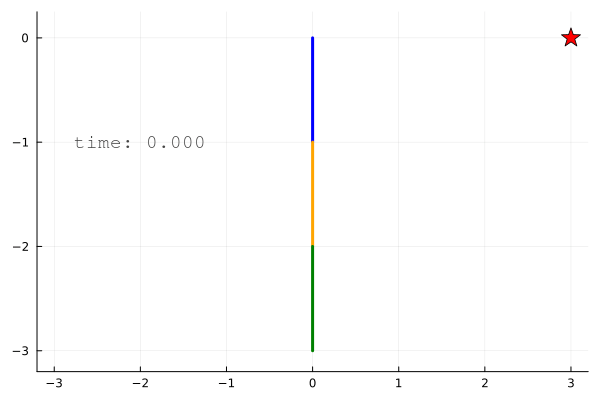

In [16]:
gif(anim, "./data_image/point_tracking_gravity_tf_free_input_velocity_const.gif", fps=fps)

In [17]:
tplot[2]

0.01

In [18]:
1/tplot[2]

100.0